# Facies interpretation

In [1]:
import pandas
import numpy as np
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from helper import auto_detect_facies

In [4]:
# Load data
data = pandas.read_csv('../data/datablob.csv', index_col=0)

In [5]:
data.columns

Index(['tvdss', 'BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF',
       'RESD', 'RESM', 'RESS', 'SP', 'fm', 'well', 'DTS', 'GR_CORR',
       'NEUT_CORR', 'RESD_CORR', 'RESS_CORR', 'TEMP', 'TENS'],
      dtype='object')

In [6]:
facies = []
for i in tqdm(range(len(data))):
    facies.append(auto_detect_facies(gamma_ray=data['GR'].iloc[i], density=data['DENS'].iloc[i], acoustic=data['DTC'].iloc[i], PE=data['PEF'].iloc[i]))

100%|██████████| 247530/247530 [00:33<00:00, 7417.64it/s] 


In [7]:
len(facies), len(data)

(247530, 247530)

In [8]:
data['facies'] = facies

Now to see what this does.

In [9]:
data['facies'].unique()

array(['NO FACIES', 'SH', 'SL', 'SS', 'AN', 'LS'], dtype=object)

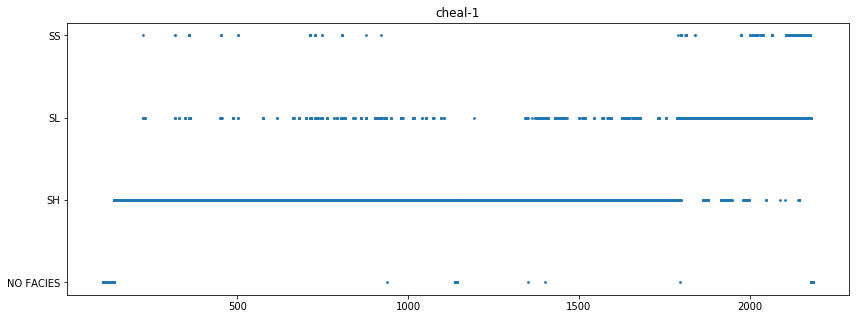

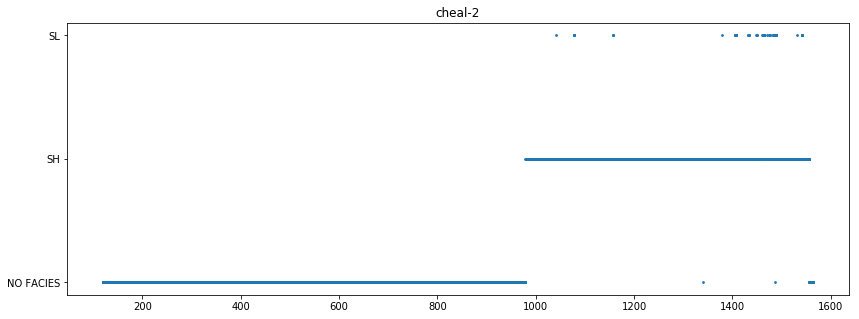

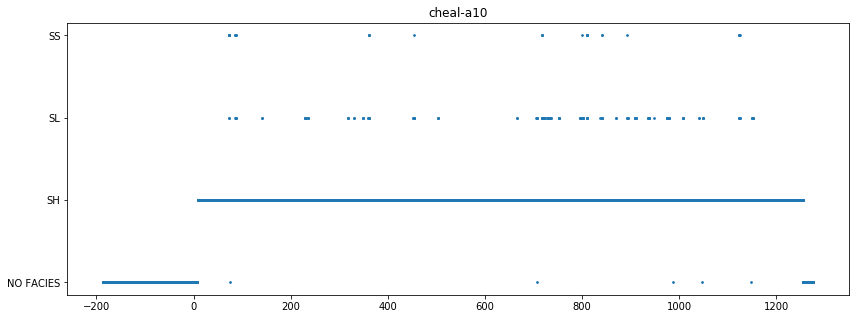

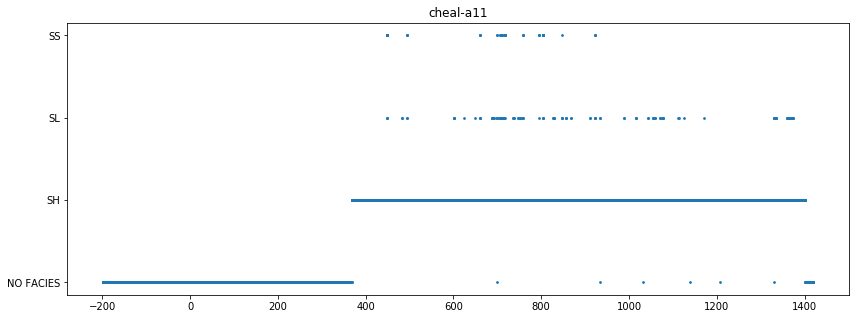

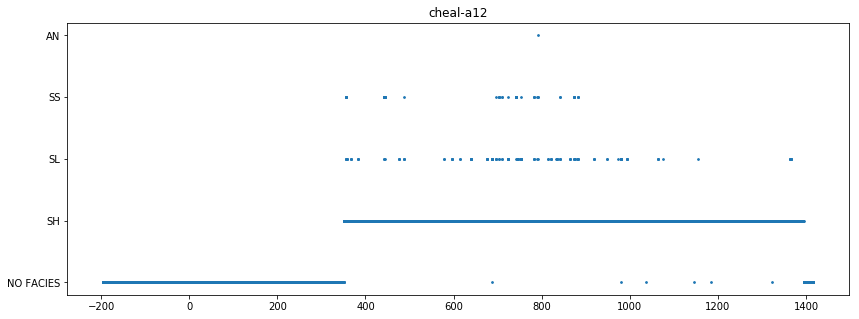

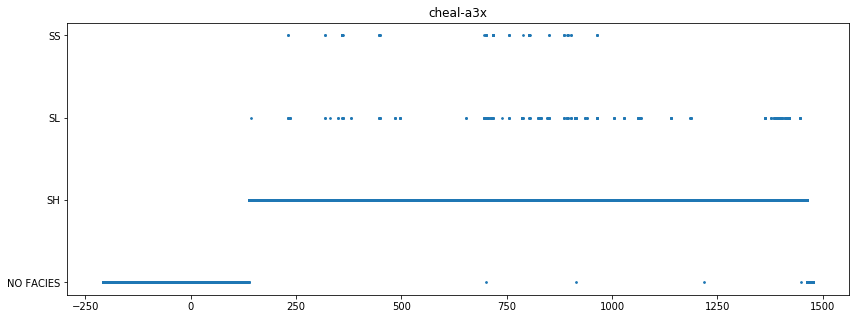

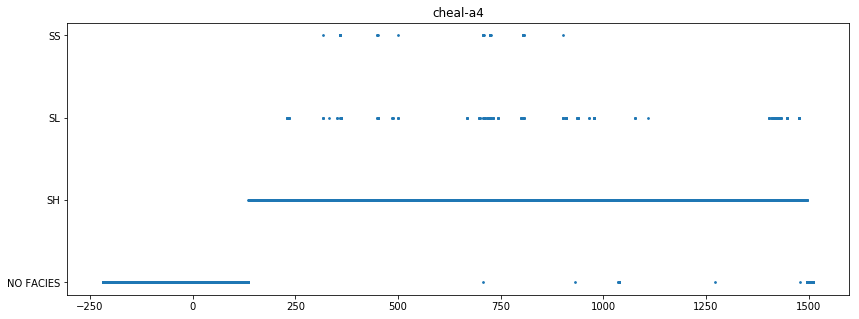

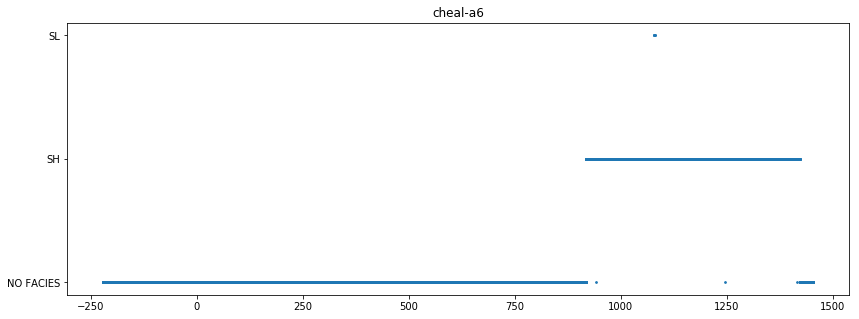

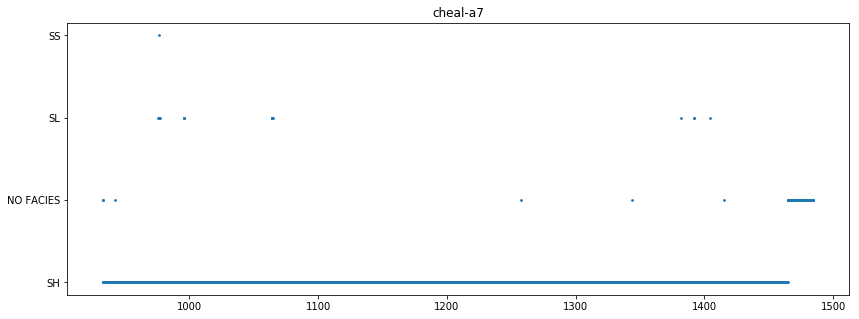

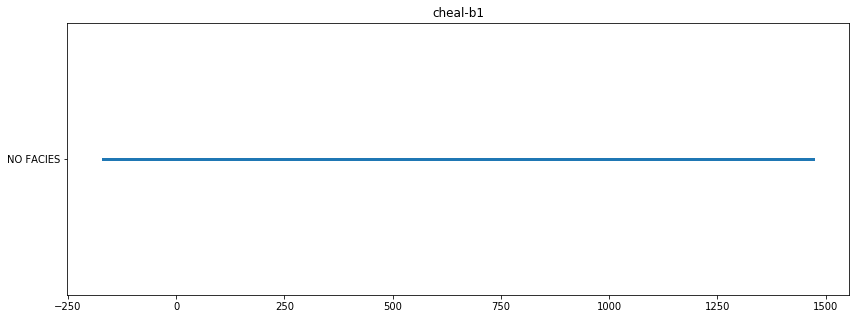

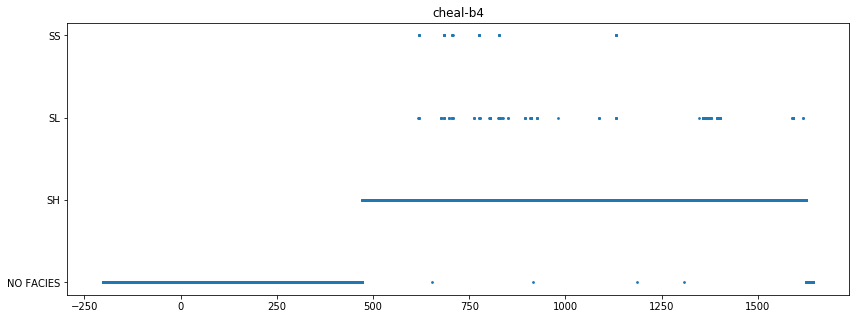

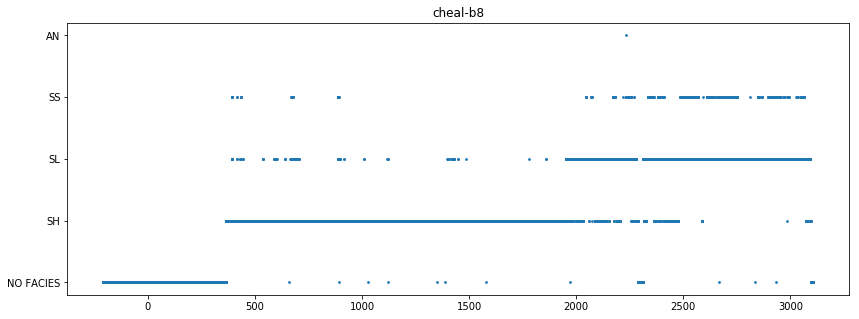

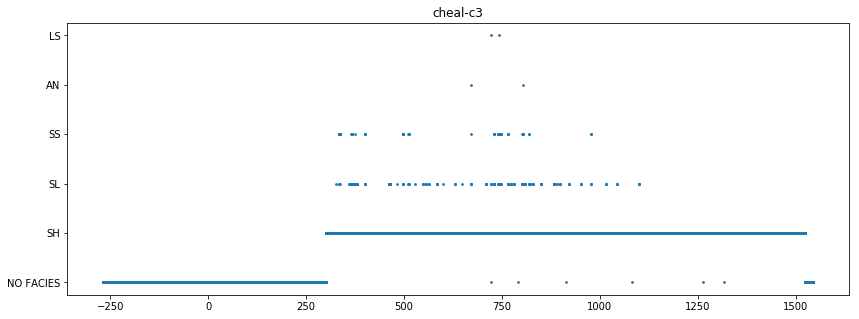

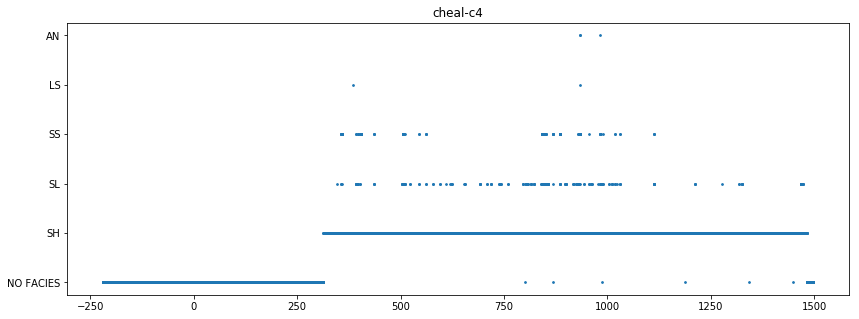

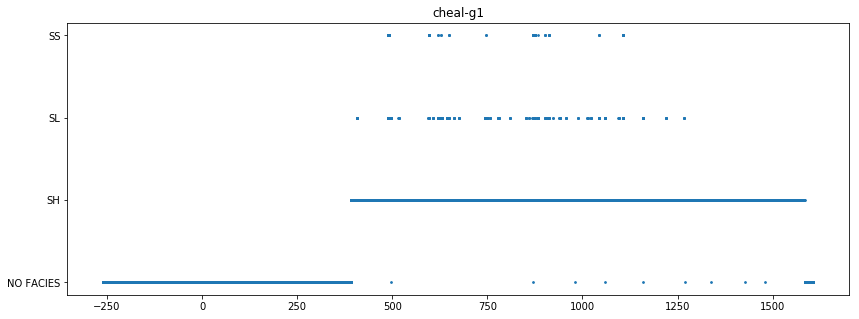

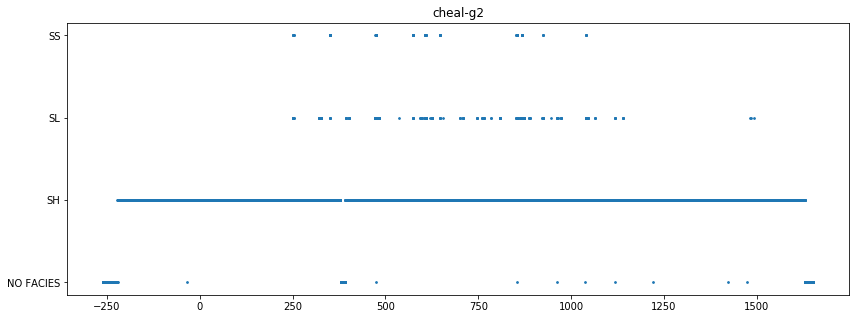

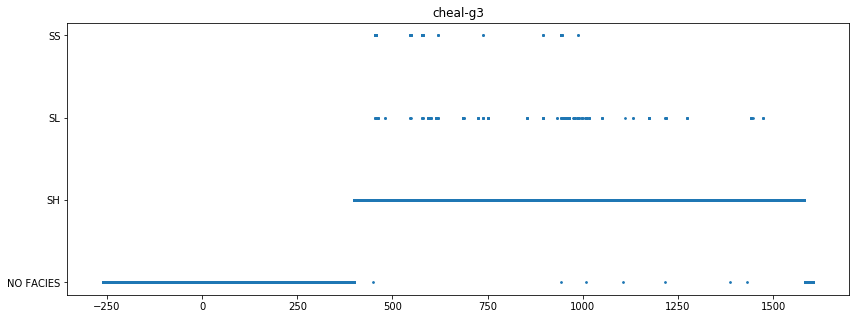

In [10]:
for well, df in data.groupby('well'):
    if len(df['facies'].dropna()) == 0:
        print('Skip well %s as no facies calculated' % well)
    else:
        plt.figure(figsize=(14, 5))
        plt.scatter(df['tvdss'], df['facies'], s=3)
        plt.title(well)
        plt.show()

In [11]:
data.to_csv('../data/datablob_added_facies.csv')

In [12]:
print('Job done')

Job done
